# <img src="http://datapao.com/wp-content/themes/datapao/img/header.svg" style="display:inline"/>  Budapest Data Meetups

This notebook contains the overview of the Budapest Data community through the numbers of the [meetup.com](https://meetup.com).

#### Data source
If you are interested in the source data, visit [our blog](https://datapao.com/blog/) where we publish our data sources. <br/>
On our blog post we share the work of others too! Send us your take on this data.



#### Source code
This noteboook and the crawlers are available on our [Github site](https://github.com/datapao/budapest-data-community/). 


---
<img src="logo.png" alt="Drawing" style="width: 100px;"/>

In [32]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import matplotlib.pylab as plot

In [33]:
meetups = pd.read_csv("data/meetup_groups_budapest_data.csv",names=["rating","name","id","urlname","member"],delimiter=";")

## Number of meetups

In [34]:
meetups["urlname"].count()

31

## Member count distribution

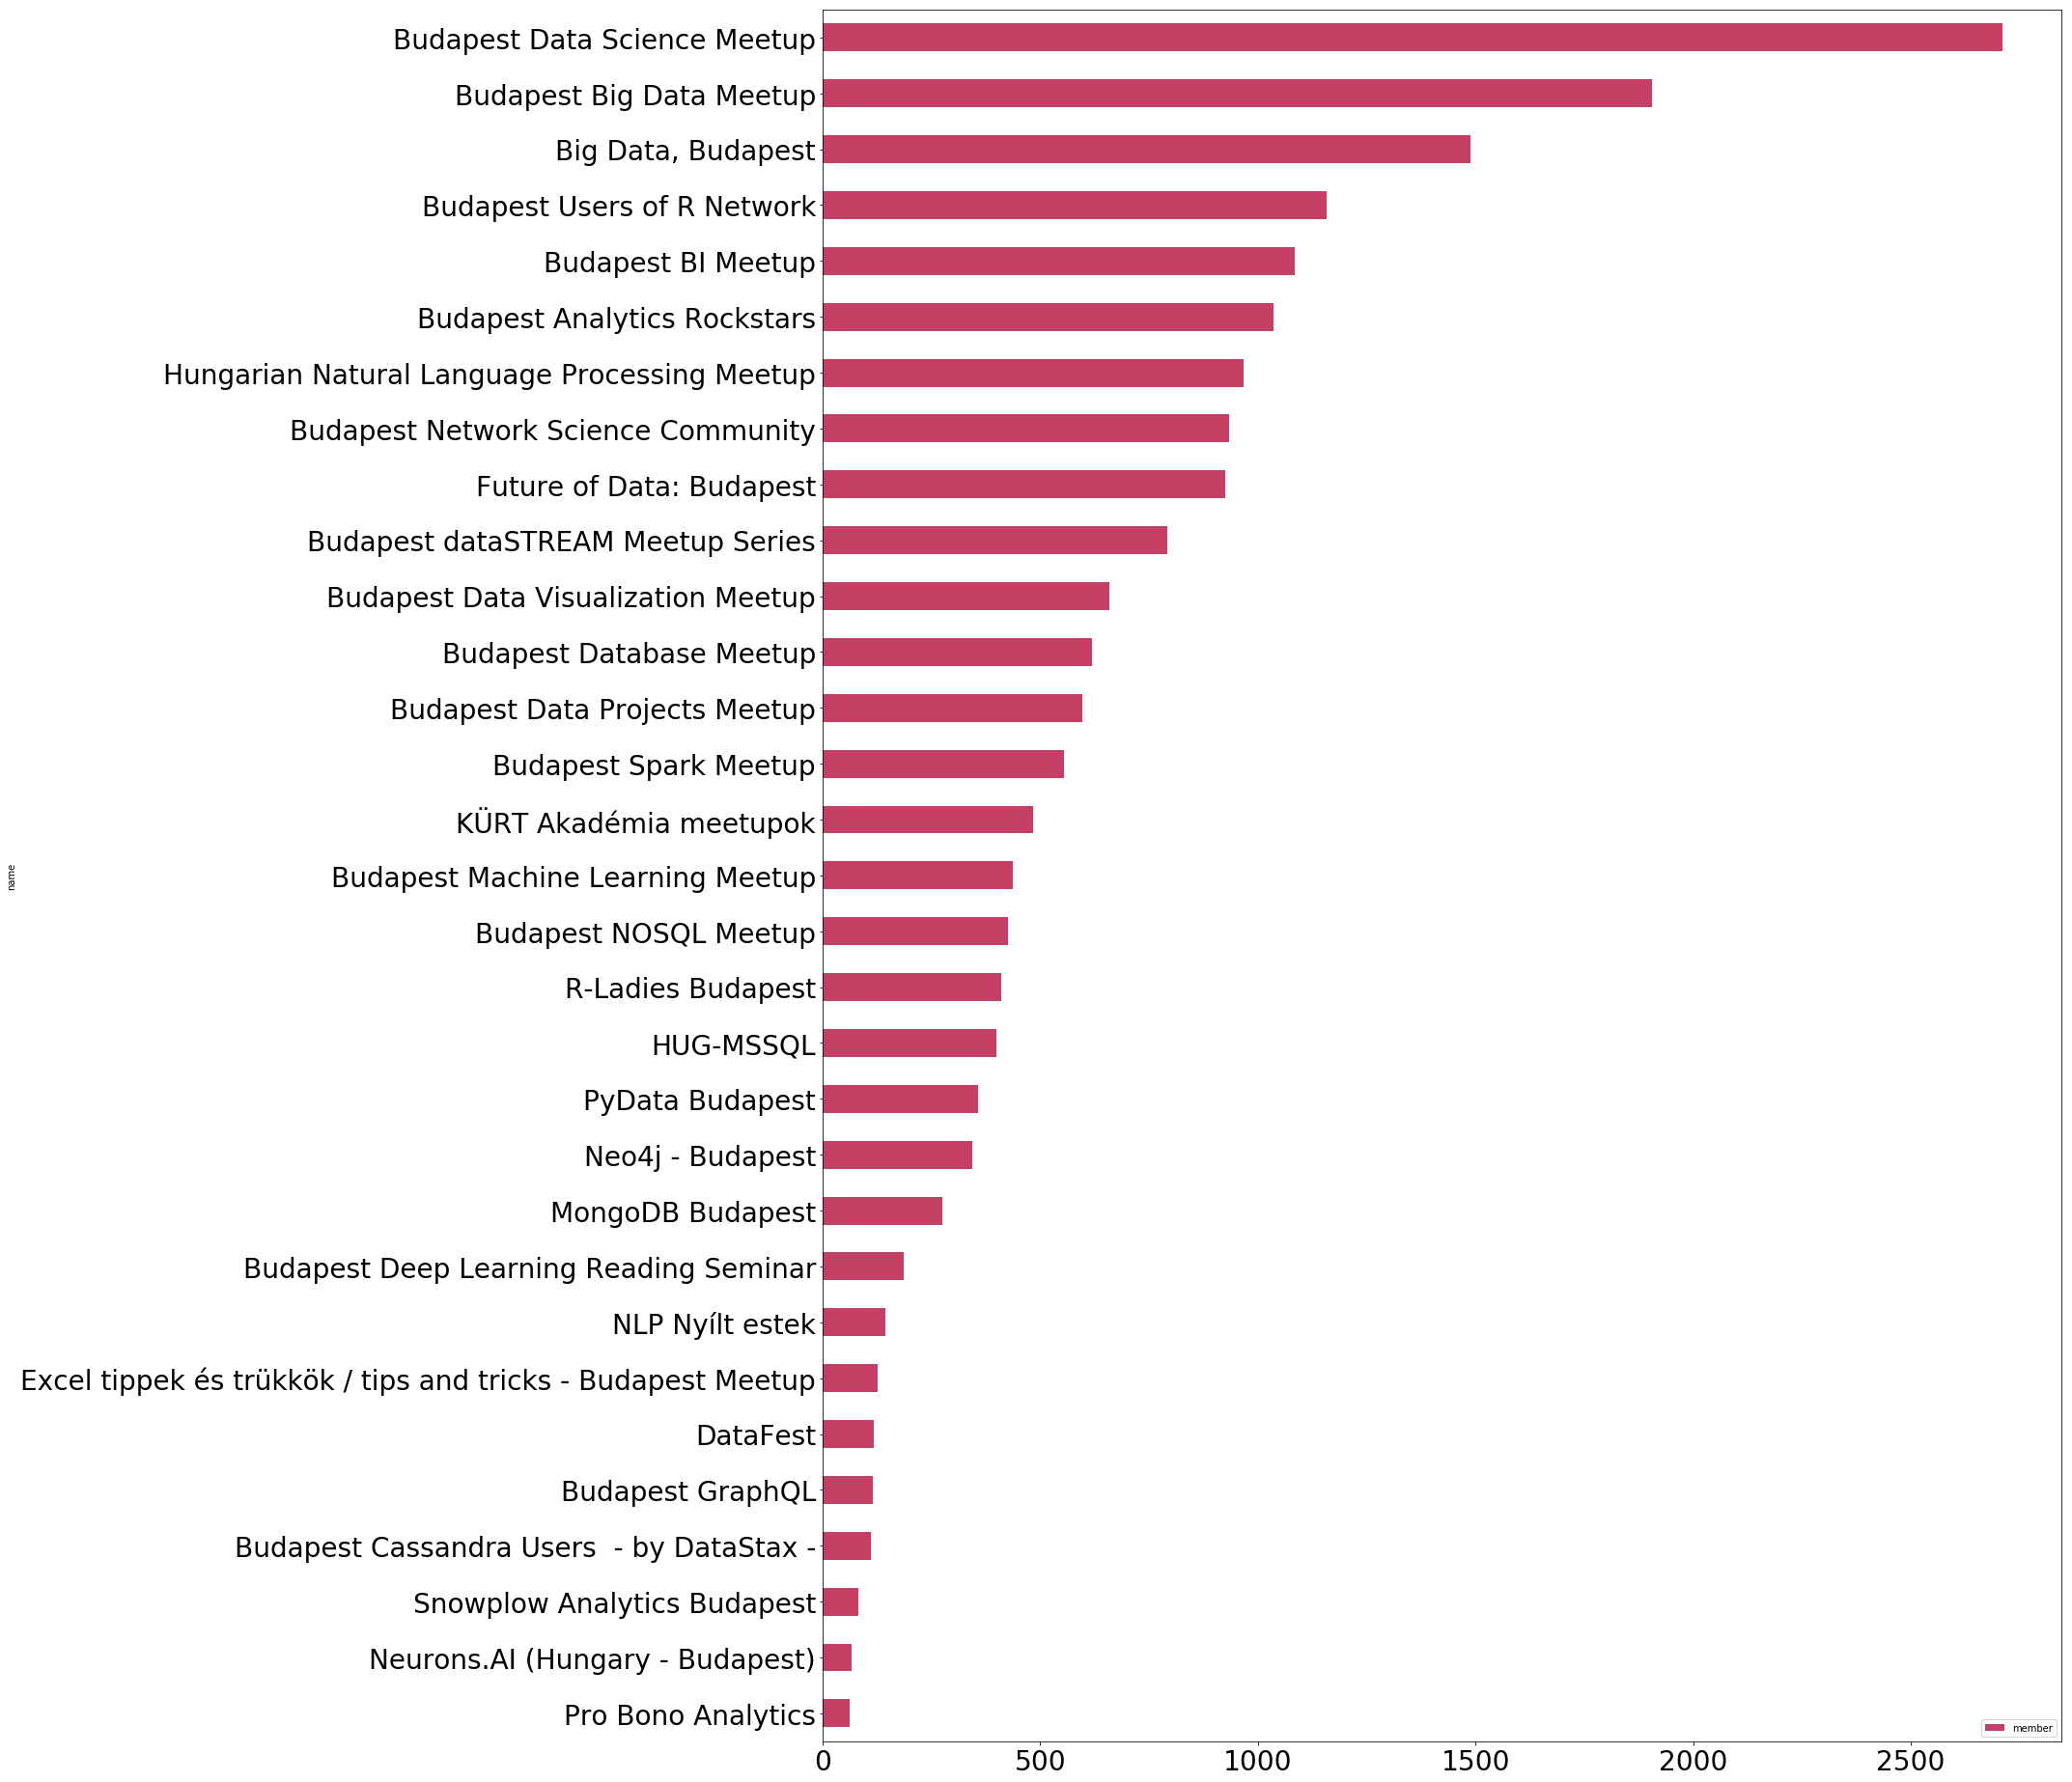

In [35]:
meetups[["name","member"]].sort_values(by="member").plot(kind='barh',
          x='name',
          y='member',
          figsize=(23,33),
          fontsize=28,
          color='#c53f64ff')

## Ratings of the data meetups

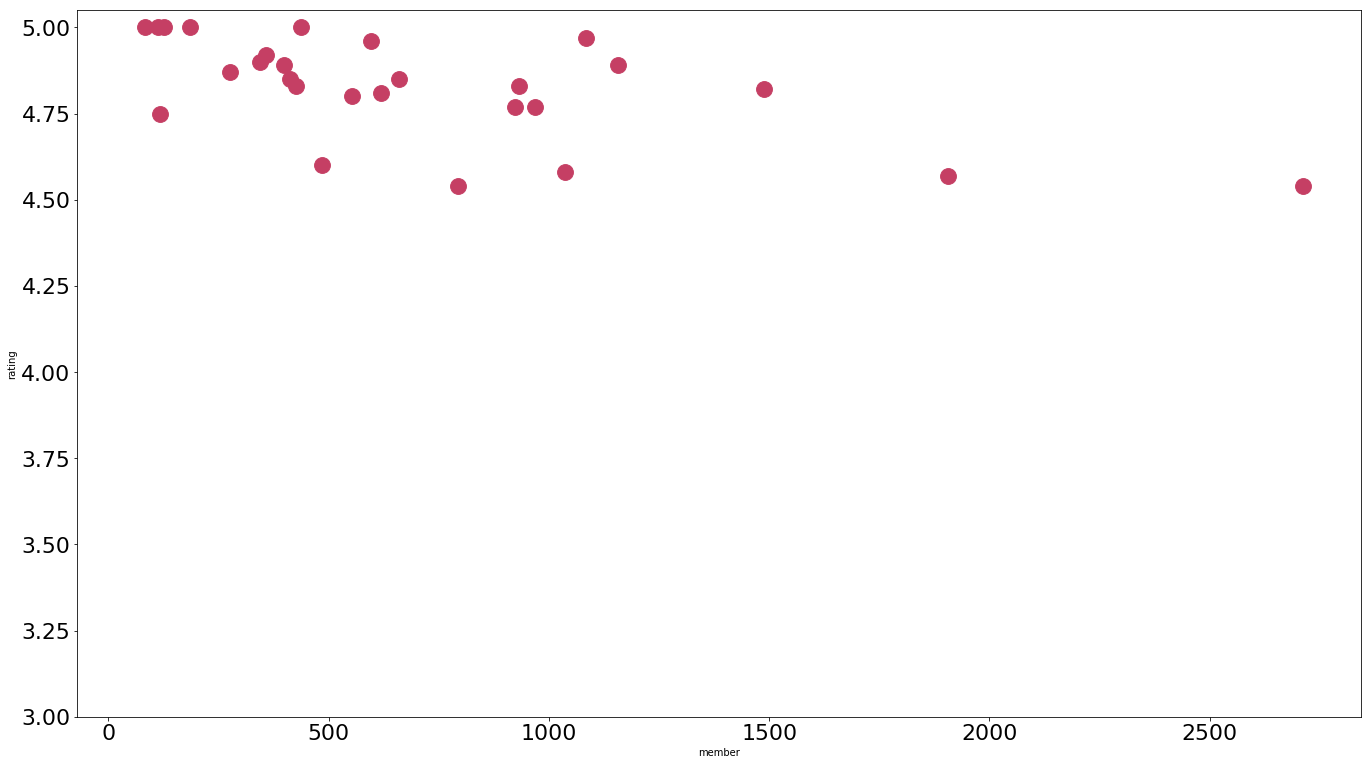

In [36]:
meetups.sort_values(by="member", ascending=False).plot(kind='scatter',y='rating',x='member',figsize=(23,13),fontsize=22, s=250, ylim=[3,5.05],color='#c53f64ff')

## Number of unique members on data meetups

In [37]:
members = pd.read_csv("data/members_budapest_data.csv", delimiter=";", names=["country","city","joined","name","id","visited","group"])

In [38]:
len(members.name.unique())

7551

## How many data meetups a member join?

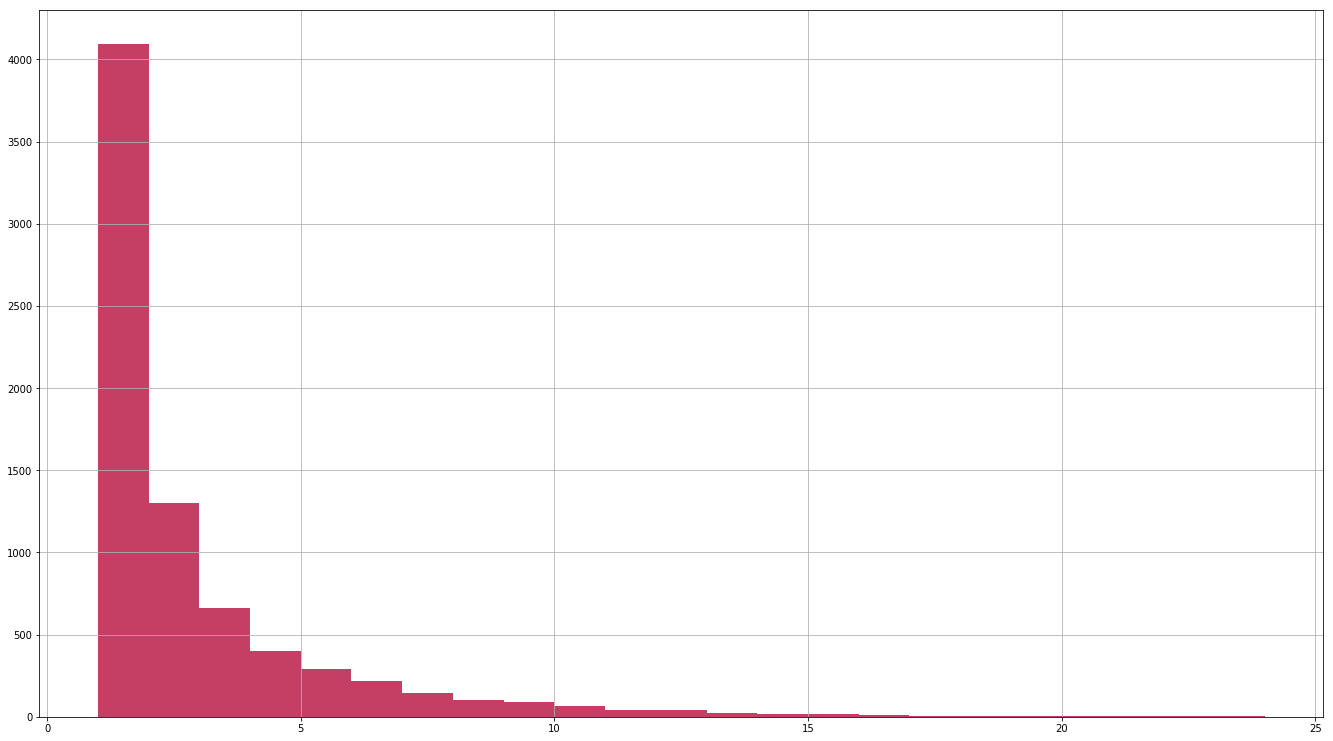

In [39]:
members.groupby("name")["group"].count().hist(figsize=(23,13), bins=range(1, 25, 1),color='#c53f64ff')

# Which cities members come from

In [40]:
members[["city",'name']].drop_duplicates().groupby("city").count().sort_values(by="name", ascending=False)

,name
city,
Budapest,6441
London,89
Aba,46
Berlin,41
Szeged,38
San Francisco,31
Budaörs,28
Amsterdam,26
Vienna,24


## Distinct cities members are coming from

In [41]:
members["city"].drop_duplicates().count()

372

# Group membership over time

In [42]:
members = members[members.joined != "Budapest"]
members = members[members.joined != "Mountain View"]

In [43]:
members["joined"] = pd.to_datetime(members.joined, unit="ms")

In [44]:
members["const"] = 1

In [45]:
import numpy as np

In [46]:
p = pd.pivot_table(members, "const", "joined", "group", np.sum).fillna(0)

In [47]:
members_overtime = p.resample("D").sum().fillna(0).cumsum()

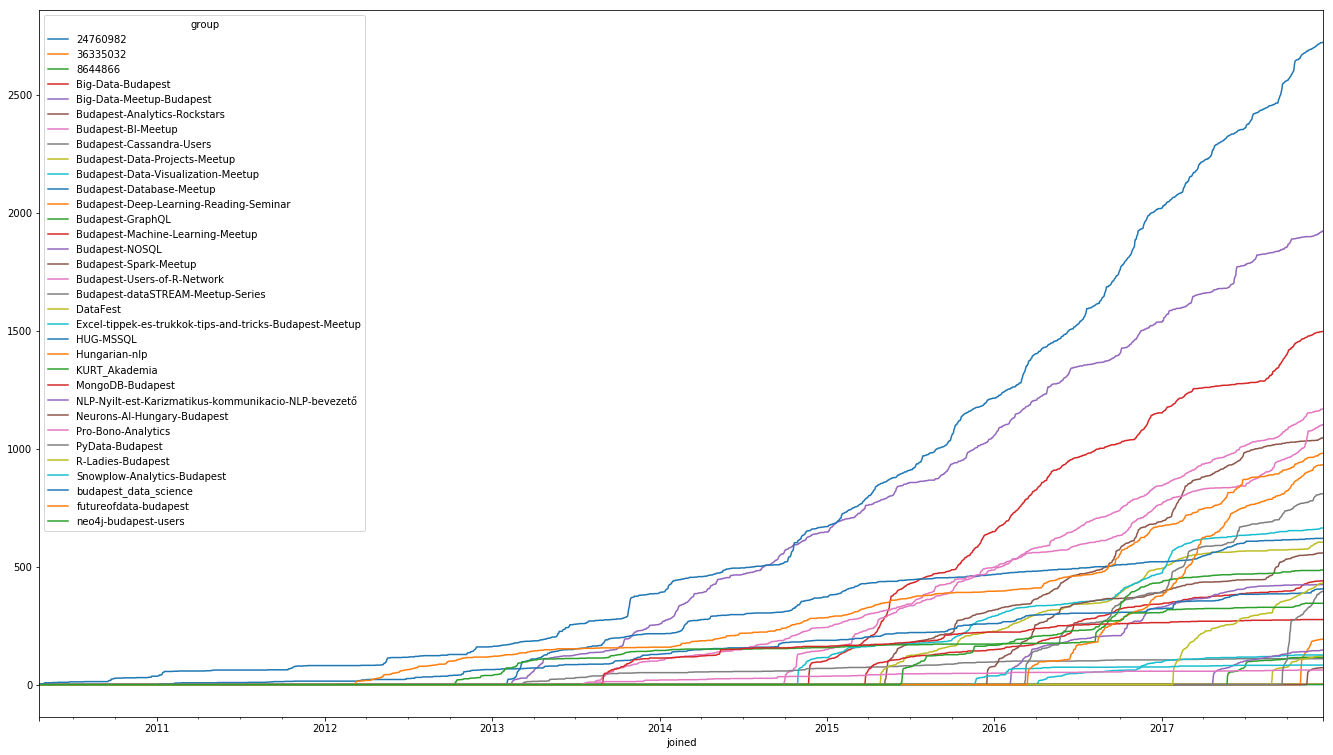

In [48]:
members_overtime.plot(kind="line", figsize=(23,13))

## Dive into the most popular meetups

In [49]:
popular_groups=[
    'budapest_data_science',
    'Budapest-Users-of-R-Network',
    'Big-Data-Meetup-Budapest',
    'Big-Data-Budapest'
]

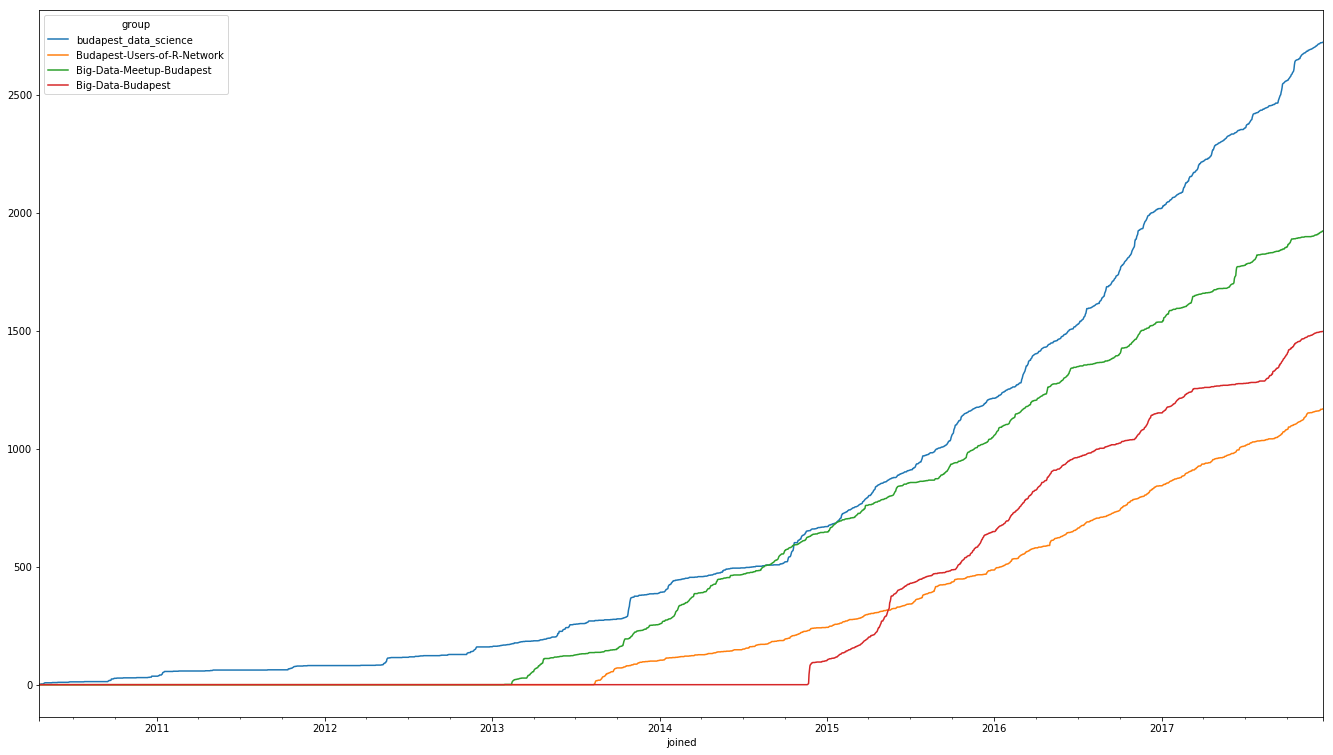

In [50]:
members_overtime[popular_groups].plot(kind="line", figsize=(23,13))

## Tech trends and meetups

In [51]:
all_groups =[
    'Neurons-AI-Hungary-Budapest',
    'Budapest-Machine-Learning-Meetup',
    'Budapest-Deep-Learning-Reading-Seminar',
    'budapest_data_science',
    'Big-Data-Meetup-Budapest'
]

In [52]:
all_members = members[members.group.isin(all_groups)]
all_members.loc[:,"joined"] = pd.to_datetime(all_members.joined, unit="ms")
all_members.loc[:,"const"] = 1
p2 = pd.pivot_table(all_members, "const", "joined", "group", np.sum).fillna(0)
all_members_overtime = p2.resample("D").sum().fillna(0).cumsum()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


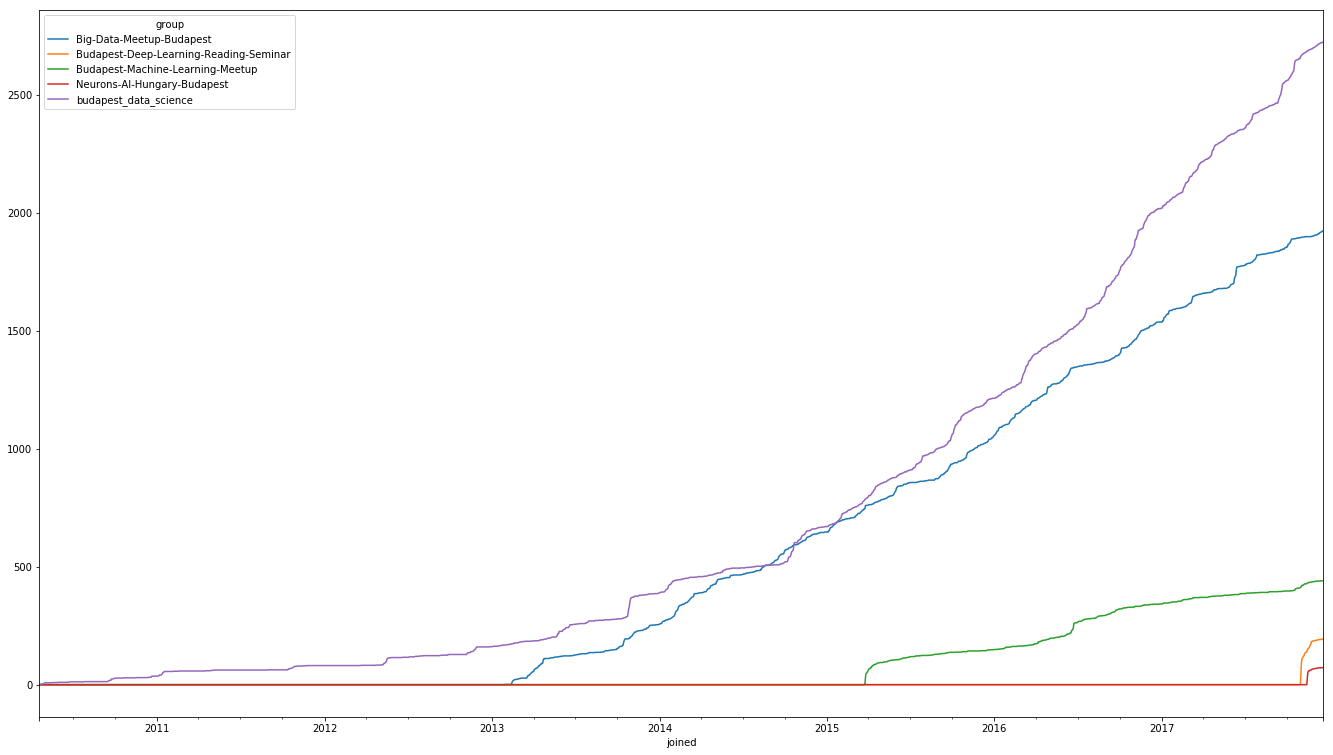

In [53]:
all_members_overtime.plot(kind="line", figsize=(23,13))

## New members over time

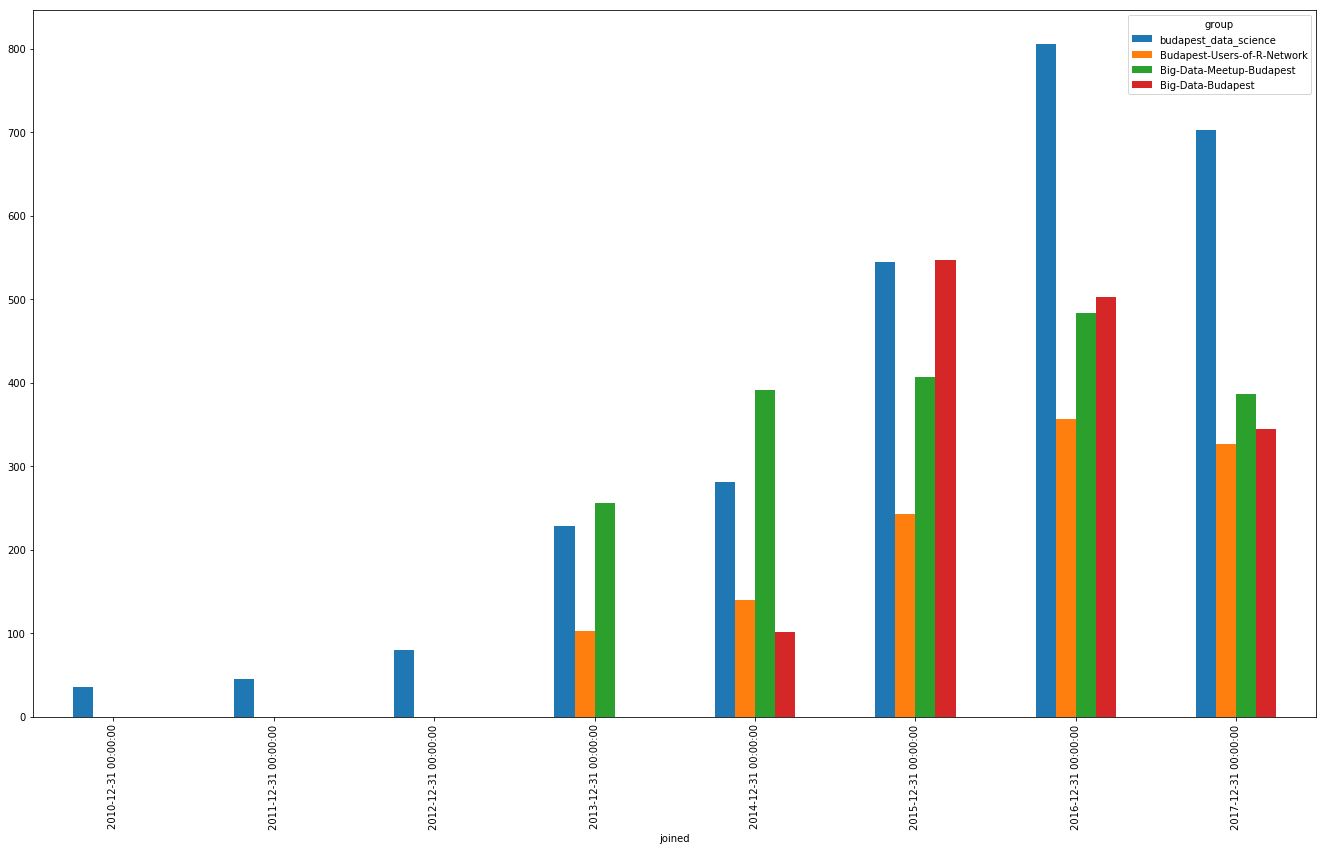

In [54]:
p.resample("A").sum().fillna(0)[popular_groups].plot(kind='bar', figsize=(23,13))

In [55]:
members_overtime = p.resample("M").sum().fillna(0)

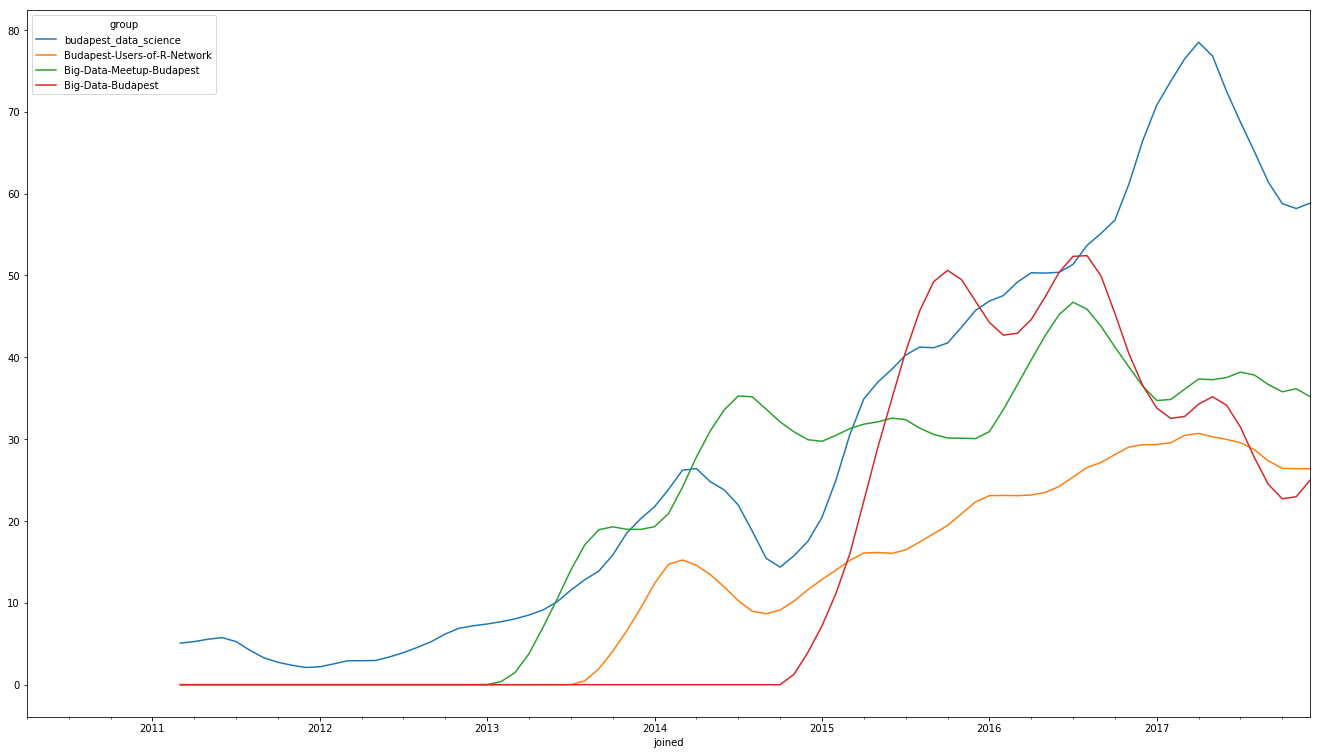

In [56]:
members_overtime[popular_groups].rolling(12, win_type='triang').mean().plot(kind='line', figsize=(23,13))

<span style="font-weight: bold;">*Created with love at Datapao*</span>

---
<img src="logo.png" alt="Drawing" style="width: 100px;"/>